# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/ethereum_train_7_3.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,0.23180
2020-06-02,0.24801
2020-06-03,0.23790
2020-06-04,0.24453
2020-06-05,0.24337


In [3]:
df_test = pd.read_csv("../../../Dataset/ethereum_test_7_3.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2021-10-26,4.21992
2021-10-27,4.13006
2021-10-28,3.92154
2021-10-29,4.28490
2021-10-30,4.41370


# Vẽ đồ thị

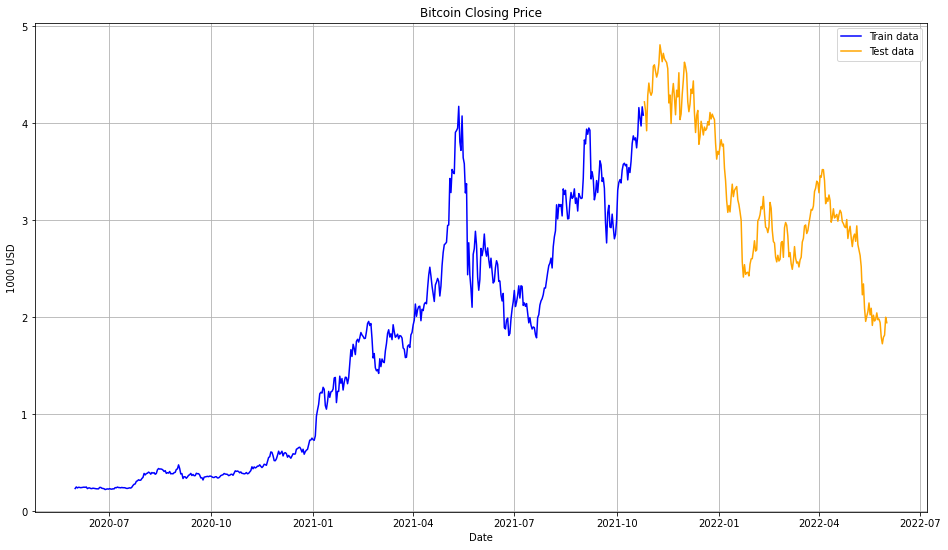

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(512, 1)
(219, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,0.23180
2020-06-02,0.24801
2020-06-03,0.23790
2020-06-04,0.24453
2020-06-05,0.24337
...,...
2021-10-21,4.16051
2021-10-22,4.05389
2021-10-23,3.97094


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-781.004, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-776.060, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-781.967, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-781.026, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-775.784, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-781.613, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-784.604, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-780.798, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-783.004, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-782.015, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-784.020, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.684 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  512
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 396.302
Date:                Sun, 26 Jun 2022   AIC                           -784.604
Time:                        15:09:13   BIC                           -767.659
Sample:                             0   HQIC                          -777.961
                                - 512                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0138      0.009      1.557      0.120      -0.004       0.031
ar.L1         -0.8289      0.070    -11.824      0.000      -0.966      -0.692
ma.L1          0.7407      0.090      8.201      0.000       0.564       0.918
sigma2         0.0124      0.000     38.121      0.000       0.012       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              3097.48
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             126.94   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([4.10910383, 4.10101212, 4.12153028, 4.11833377, 4.13479432,
       4.13496116, 4.14863382, 4.15111153, 4.16286872, 4.16693417,
       4.17737529, 4.18253162, 4.1920685 , 4.19797436, 4.20688997,
       4.21331079, 4.22179954, 4.22857419, 4.23676965, 4.24378741,
       4.25178136, 4.25896615, 4.26682165, 4.2741212 , 4.28188158,
       4.28925997, 4.29695499, 4.30438756, 4.31203768, 4.31950747,
       4.32712673, 4.3346221 , 4.34222016, 4.3497331 , 4.3573166 ,
       4.36484161, 4.3724151 , 4.3799484 , 4.38751502, 4.39505402,
       4.40261592, 4.41015884, 4.41771748, 4.42526309, 4.43281951,
       4.44036697, 4.44792185, 4.45547058, 4.46302441, 4.47057401,
       4.47812712, 4.48567732, 4.49322993, 4.50078055, 4.50833282,
       4.51588371, 4.52343575, 4.53098684, 4.53853871, 4.54608994,
       4.5536417 , 4.56119302, 4.5687447 , 4.57629608, 4.58384771,
       4.59139914, 4.59895074, 4.60650219, 4.61405376, 4.62160524,
       4.62915679, 4.63670828, 4.64425982, 4.65181132, 4.65936

# Vẽ đồ thị cho tập test và kết quả dự đoán


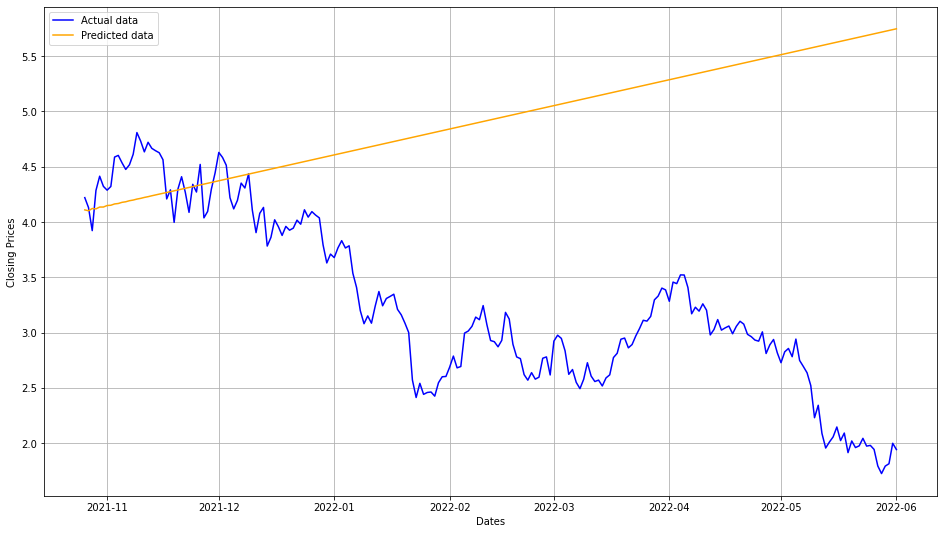

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 65.40%
RMSE: 2.06
R2: -603.59%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2021-10-26,4.21992,4.109104,0.110816
2021-10-27,4.13006,4.101012,0.029048
2021-10-28,3.92154,4.121530,-0.199990
2021-10-29,4.28490,4.118334,0.166566
2021-10-30,4.41370,4.134794,0.278906
...,...,...,...
2022-05-28,1.72467,5.716575,-3.991905
2022-05-29,1.79225,5.724127,-3.931877
2022-05-30,1.81356,5.731679,-3.918119
2022-05-31,1.99846,5.739230,-3.740770


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-3.991905,1.653696e+09
2022-05-29,-3.931877,1.653782e+09
2022-05-30,-3.918119,1.653869e+09
2022-05-31,-3.740770,1.653955e+09
2022-06-01,-3.804972,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(219, 1)
(219, 1)


<h1>Vẽ đồ thị thể hiện sai số

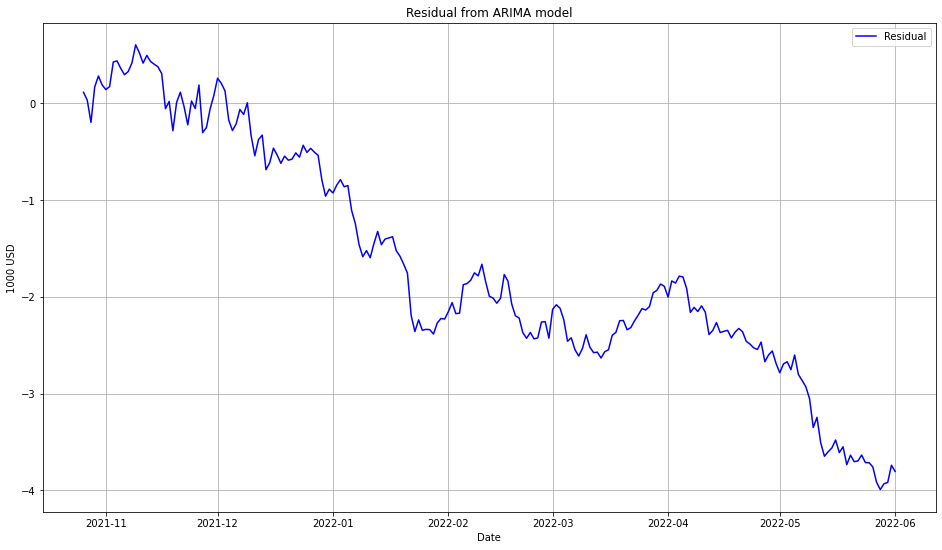

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=1.75 | RMSE=1.32
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=1.34 | RMSE=1.16
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=1.08 | RMSE=1.04
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=0.92 | RMSE=0.96
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=0.82 | RMSE=0.90
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=0.77 | RMSE=0.88
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=0.75 | RMSE=0.87
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=0.74 | RMSE=0.86
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=0.72 | RMSE=0.85
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=0.73 | RMSE=0.85
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=0.74 | RMSE=0.86
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=0.76 | RMSE=0.87
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=0.78 | RMSE=0.88
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=0.79 | RMSE=0.89
SVR(kernel=sigmoid, C=0.01, gamma=1.5000000000000002
MSE=0.79 | RMSE=0.89
SVR(kernel=sigmoid, C=0.

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
195,rbf,0.11,4.9,0,0.06569,0.2563


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 1.26672385,  1.3022679 ,  1.33599752,  1.36775415,  1.39739185,
        1.424779  ,  1.44979967,  1.472355  ,  1.49236428,  1.50976582,
        1.52451766,  1.53659794,  1.54600511,  1.55275786,  1.55689473,
        1.55847359,  1.55757078,  1.55428005,  1.54871128,  1.54098906,
        1.53125098,  1.51964585,  1.50633179,  1.49147421,  1.47524368,
        1.45781383,  1.43935918,  1.42005303,  1.40006537,  1.37956086,
        1.35869692,  1.33762194,  1.31647367,  1.29537765,  1.27444598,
        1.25377618,  1.23345028,  1.21353414,  1.19407695,  1.17511101,
        1.15665169,  1.13869762,  1.12123113,  1.10421886,  1.08761259,
        1.0713503 ,  1.05535734,  1.03954783,  1.02382619,  1.00808879,
        0.99222571,  0.97612265,  0.95966281,  0.9427289 ,  0.92520516,
        0.90697932,  0.88794457,  0.86800151,  0.84705991,  0.8250405 ,
        0.8018765 ,  0.77751503,  0.7519184 ,  0.72506506,  0.6969505 ,
        0.66758769,  0.6370075 ,  0.60525864,  0.57240748,  0.53

# Vẽ đồ thị

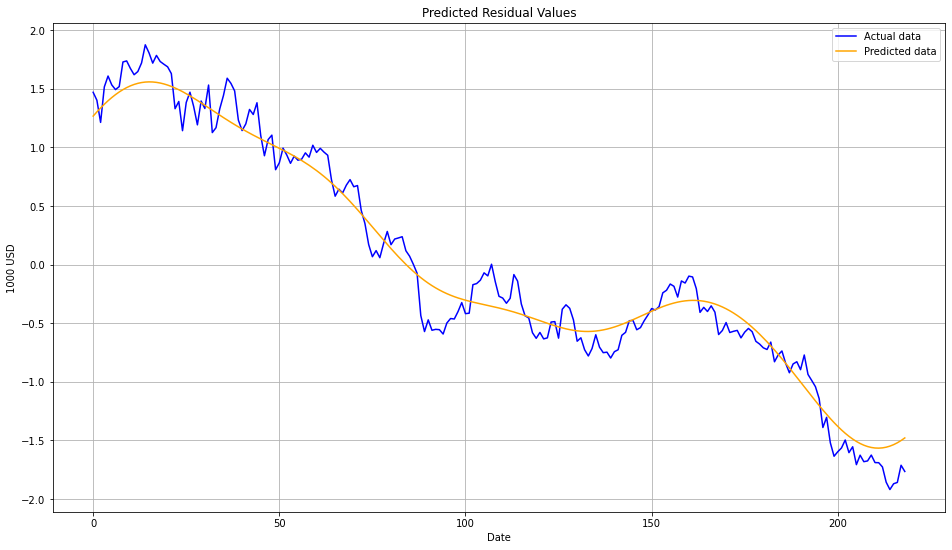

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,1.72467,5.716575,-3.991905,-3.543285,2.173290
2022-05-29,1.79225,5.724127,-3.931877,-3.528046,2.196081
2022-05-30,1.81356,5.731679,-3.918119,-3.508777,2.222901
2022-05-31,1.99846,5.739230,-3.740770,-3.485594,2.253636
2022-06-01,1.94181,5.746782,-3.804972,-3.458638,2.288143


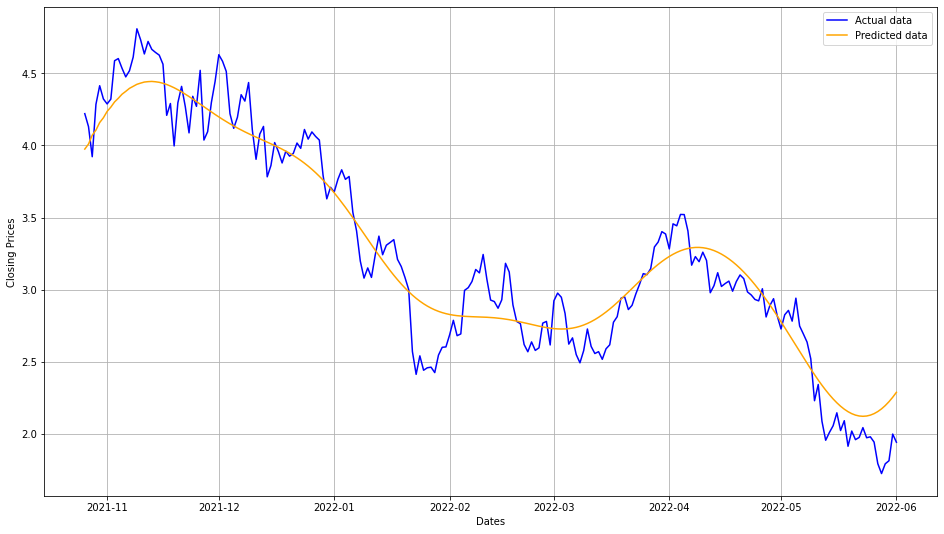

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 0.20
MAPE: 5.67%
R-Squared: 0.93
